<a href="https://colab.research.google.com/github/Shahriar-Tonmoy/Bangla_writtendigit_recognization/blob/master/SC_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)

In [ ]:
!gdown --id 10TbLFo2cgcmlNjgQMZeiI_D68StH5gfW

Downloading...
From: https://drive.google.com/uc?id=10TbLFo2cgcmlNjgQMZeiI_D68StH5gfW
To: /content/Dataset C.zip
162MB [00:01, 148MB/s]


In [ ]:
!unzip '/content/Dataset C.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   

In [ ]:
traning_csv = '/content/training-c.csv'
read_df = pd.read_csv(traning_csv)

In [ ]:
read_df.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [ ]:
number_of_digit_class = read_df['digit'].nunique()

DATASET_ROOT_DIR = './SC_Dataset_Assignment2/' 
path = Path(DATASET_ROOT_DIR)
path.mkdir(parents=True, exist_ok=True)
DATASET_ROOT_DIR = os.path.abspath(path)

for i in range(0,number_of_digit_class):
  select_digit = read_df[read_df['digit'] == i]
  for index,val in select_digit.iterrows():
    file_relative_path_from= f"./{val['database name']}/{val['filename']}"
    file_relative_dir_to = f"{DATASET_ROOT_DIR}/{val['digit']}"
    Path(file_relative_dir_to).mkdir(parents=True, exist_ok=True)
    shutil.copy(file_relative_path_from, file_relative_dir_to)
    print(file_relative_path_from , file_relative_dir_to , "OK")

Streaming output truncated to the last 5000 lines.
./training-c/c22339.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22368.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22403.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22404.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22415.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22423.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22435.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22456.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22462.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22477.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22488.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22497.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22513.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22517.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22524.png /content/SC_Dataset_Assignment2/7 OK
./training-c/c22533.png /content/S

In [ ]:
ZIP_FILE_NAME = 'SC_Dataset_Assignment2.zip'
!zip -r $ZIP_FILE_NAME 'SC_Dataset_Assignment2/'

Streaming output truncated to the last 5000 lines.
  adding: SC_Dataset_Assignment2/4/c04047.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c20219.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c07701.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c07969.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c16185.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c08044.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c14100.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c15013.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c13058.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c01061.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c11754.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c09248.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c10195.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c19151.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c07741.png (stored 0%)
  adding: SC_Dataset_Assignment2/4/c13885.png (stored 0%)
  adding: SC_Dataset_

In [ ]:
!cp '/content/SC_Dataset_Assignment2.zip'  '/content/drive/MyDrive/SC_Dataset_Assignment2'

cp: cannot create regular file '/content/drive/MyDrive/SC_Dataset_Assignment2': No such file or directory


In [ ]:
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)


In [ ]:
!gdown --id '1-0Mc5nKDRGPEi5FBTA0hGLS6OgvTgDMq'

Downloading...
From: https://drive.google.com/uc?id=1-0Mc5nKDRGPEi5FBTA0hGLS6OgvTgDMq
To: /content/SC_Dataset_Assignment2.zip
163MB [00:01, 152MB/s]


In [ ]:
!unzip '/content/SC_Dataset_Assignment2.zip'

Streaming output truncated to the last 5000 lines.
 extracting: SC_Dataset_Assignment2/4/c11228.png  
 extracting: SC_Dataset_Assignment2/4/c10723.png  
 extracting: SC_Dataset_Assignment2/4/c04047.png  
 extracting: SC_Dataset_Assignment2/4/c20219.png  
 extracting: SC_Dataset_Assignment2/4/c07701.png  
 extracting: SC_Dataset_Assignment2/4/c07969.png  
 extracting: SC_Dataset_Assignment2/4/c16185.png  
 extracting: SC_Dataset_Assignment2/4/c08044.png  
 extracting: SC_Dataset_Assignment2/4/c14100.png  
 extracting: SC_Dataset_Assignment2/4/c15013.png  
 extracting: SC_Dataset_Assignment2/4/c13058.png  
 extracting: SC_Dataset_Assignment2/4/c01061.png  
 extracting: SC_Dataset_Assignment2/4/c11754.png  
 extracting: SC_Dataset_Assignment2/4/c09248.png  
 extracting: SC_Dataset_Assignment2/4/c10195.png  
 extracting: SC_Dataset_Assignment2/4/c19151.png  
 extracting: SC_Dataset_Assignment2/4/c07741.png  
 extracting: SC_Dataset_Assignment2/4/c13885.png  
 extracting: SC_Dataset_Assignm

In [ ]:
!rm '/content/SC_Dataset_Assignment2.zip'

rm: cannot remove '/content/SC_Dataset_Assignment2.zip': No such file or directory


.


In [ ]:
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)

In [ ]:
base_dir ='/content/SC_Dataset_Assignment2' 
BATCH_SIZE = 20

# 28(model-1), 128(model-2), 224(model-3),
IMAGE_SIZE = 28
LEARNING_RATE = 0.01
TEST_SIZE = 0.2
OUTPUT_DIM=10

#Model_2

In [ ]:
class LIN_MODEL_3(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL_3, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 512)
        self.fc_2 = torch.nn.Linear(512, 256)
        self.fc_3 = torch.nn.Linear(256,128)
        self.fc_4 = torch.nn.Linear(128,64)
        self.fc_6 = torch.nn.Linear(64, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.softmax(self.fc_2(x))
        x = torch.nn.functional.softmax(self.fc_3(x))
        x = torch.nn.functional.relu(self.fc_4(x))
        x = torch.nn.functional.softmax(self.fc_6(x))

        return x

In [ ]:
# transform = transforms.Compose([
#                                 transforms.Grayscale(), 
#                                 transforms.Resize(IMAGE_SIZE),  
#                                 transforms.CenterCrop(IMAGE_SIZE), 
#                                 transforms.ToTensor(), 
                                
#                                ])


# dataset = torchvision.datasets.ImageFolder(base_dir, transform=transform)
# n = len(dataset) 
# n_test = int(TEST_SIZE * n) 
# trainDataset, validDataSet = torch.utils.data.random_split(dataset,[n - n_test,n_test]) 
# trainloader = torch.utils.data.DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True,) 
# validationloader = torch.utils.data.DataLoader(validDataSet, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True,) 
# print("Length of the trainloader:", len(trainloader ) * BATCH_SIZE)
# print("Length of the validationloader:", len(validationloader ) * BATCH_SIZE)

In [ ]:
trainDataset = torchvision.datasets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),  # Normalize the image to [0-1] from [0-255]
                            download=True)

validDataSet = torchvision.datasets.FashionMNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
MAKING DATASET ITERABLE
'''

trainloader = torch.utils.data.DataLoader(dataset=trainDataset, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

validationloader = torch.utils.data.DataLoader(dataset=validDataSet, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=False)  

print("Length of the trainloader:", len(trainloader ) * BATCH_SIZE)
print("Length of the validationloader:", len(validationloader ) * BATCH_SIZE)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Length of the trainloader: 60000
Length of the validationloader: 10000


##Create Model

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

##Model_1

In [ ]:
'''
Model creation 
'''

class LIN_MODEL(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 100)
        self.fc_2 = torch.nn.Linear(100, 60)
        self.fc_3 = torch.nn.Linear(60, 40)
        self.fc_4 = torch.nn.Linear(40, 20)
        self.fc_5 = torch.nn.Linear(20, 10)
        self.fc_6 = torch.nn.Linear(10, outDim)

        self.linear = torch.nn.Linear(784, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.softmax(self.fc_2(x),dim=1)
        x = torch.nn.functional.relu(self.fc_3(x))
        x = torch.nn.functional.softmax(self.fc_4(x),dim=1)
        x = torch.nn.functional.relu(self.fc_5(x))
        x = self.fc_6(x)       
        return x
        

model_1 = LIN_MODEL(OUTPUT_DIM).to(device)

summary( model_1, input_size=(1, 28, 28))
print(model_1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,500
            Linear-2                   [-1, 60]           6,060
            Linear-3                   [-1, 40]           2,440
            Linear-4                   [-1, 20]             820
            Linear-5                   [-1, 10]             210
            Linear-6                   [-1, 10]             110
Total params: 88,140
Trainable params: 88,140
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.34
Estimated Total Size (MB): 0.34
----------------------------------------------------------------
LIN_MODEL(
  (fc_1): Linear(in_features=784, out_features=100, bias=True)
  (fc_2): Linear(in_features=100, out_features=60, bias=True)
  (fc_3): Linear(in_features=60, out

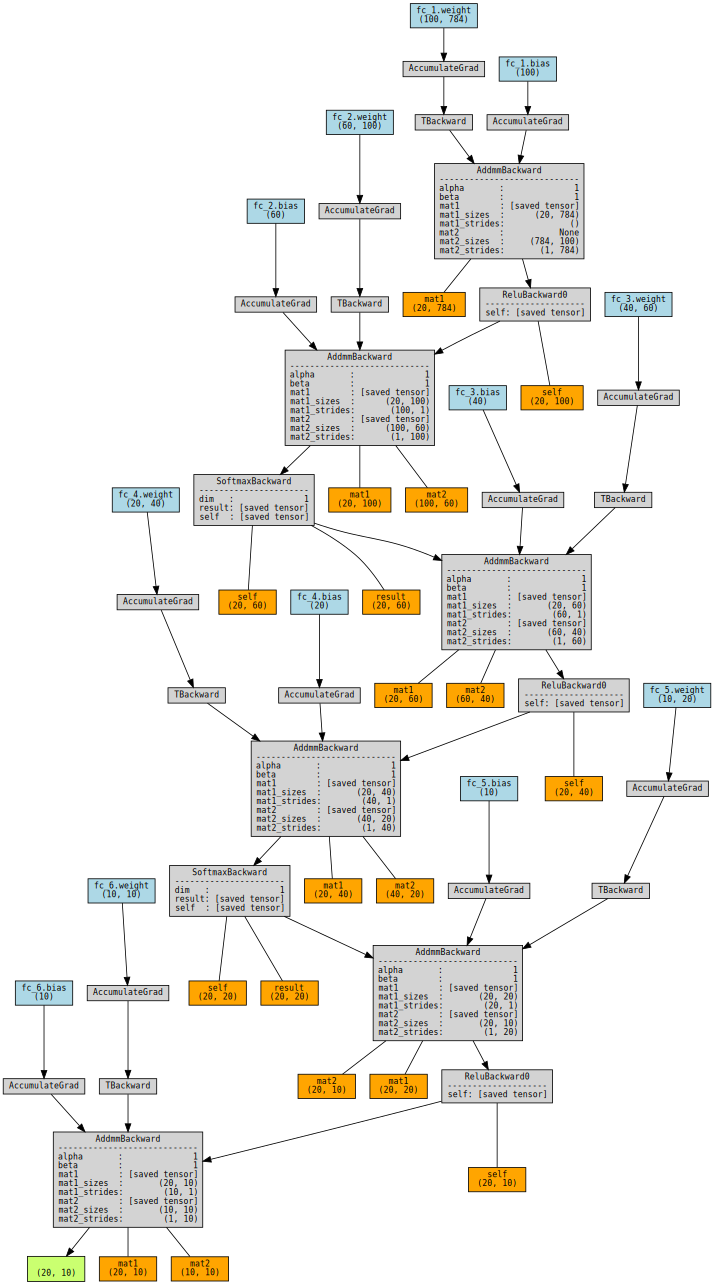

In [ ]:
x = torch.randn(BATCH_SIZE,1,28,28).to(device)
make_dot(model_1(x), params=dict(model_1.named_parameters()), show_attrs=True, show_saved=True)

In [ ]:
make_dot(model_1(x), params=dict(model_1.named_parameters()), show_attrs=True, show_saved=True).render("Model-1", format="png")

'Model-1.png'

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),lr=LEARNING_RATE, )

#Training

In [ ]:
def save_model(
               MODEL_USED,
               SAVEPATH,
               epoch, 
               batch_size, 
               model,
               optimizer,
               image_size,
               tranning_loss=[],
               tranning_acc=[],
               validation_loss=[],
               validation_acc=[],
               learning_rate=0.001,
               meta_data=None):
  SAVEPATH += f"{MODEL_USED}-checkpoint-epoch-{epoch}.pt"
  save_obj = {
       'MODEL_USED':MODEL_USED,
       'batch_size':batch_size,
       'epoch': epoch,
       'model_full': model,
       'optimizer_full': optimizer,
       'model_state': model.state_dict(),
       'optimizer_state': optimizer.state_dict(),
       'image_size': image_size,
       'tranning_loss': tranning_loss,
       'tranning_acc': tranning_acc,
       'validation_loss': validation_loss,
       'validation_acc': validation_acc,
       'learning_rate':learning_rate,
       'meta_data':meta_data
       }

  torch.save(save_obj, SAVEPATH)

In [ ]:
def train_model(start, end, 
                model_used ,
                model_save_path, 
                model, 
                criterion, 
                optimizer, 
                dataloaders,
                testloaders , 
                lernRate=0.01,
                all_tranning_loss=[], all_validation_loss=[], all_tranning_accuracy=[], all_validation_accuracy=[]):
    since = time.time()
    num_epochs = end
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    phase = 'train'
    steps = 0

    for epoch in range(start,num_epochs):
          model.train()
          phase = 'tranning'
          print('Epoch {}/{}'.format(epoch, num_epochs - 1))
          print('-' * 10)
          running_loss = 0.0
          running_corrects = 0

          for i,(inputs, labels) in enumerate(dataloaders):
                
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                loss.backward()
                optimizer.step()

                # running_loss += loss.item() * inputs.size(0)
                running_loss += loss.item()
                running_corrects += torch.sum(preds == labels.data)
                

                print_val = f"Epoch: {epoch}/{num_epochs-1} Steps {steps} \t"
                print_val += f"running_loss : {(loss.item()):.6f}\t"
                print_val += f"running_corrects : {torch.sum(preds == labels.data)}\t"  
                print_val += f"total_corrects : {running_corrects}\t"  
                sys.stdout.write('\r' + str(print_val))
                steps += 1
          
          
          steps = 0
          epoch_loss = running_loss / len(dataloaders)
          epoch_acc = running_corrects.double().item() /len(dataloaders.dataset)
          all_tranning_loss.append(loss.item())
          all_tranning_accuracy.append(epoch_acc)
          
          
          print("\n")
          print("----------------------------Tranning Summary----------------------")
          print('{} Tranning Avg. Loss: {:.4f} Tranning Avg. Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
          print("-"*70)
          print("\n")

          print("Start Validation")
          model.eval()
          with torch.no_grad():
              phase = "validation"
              running_loss = 0.0
              running_corrects = 0
              for i,(inputs, labels) in enumerate(testloaders):
                  inputs, labels = inputs.to(device), labels.to(device)
                  outputs = model(inputs)
                  _, preds = torch.max(outputs, 1)
                  loss = criterion(outputs, labels)
                    
                  running_loss += loss.item()
                  running_corrects += torch.sum(preds == labels.data)  

                  print_val = f"Steps {i} \t"
                  print_val += f"validation_running_loss : {(loss.item()):.6f}\t"
                  print_val += f"validation_running_corrects : {torch.sum(preds == labels.data)}\t"  
                  print_val += f"validation_total_corrects : {running_corrects}\t"  
                  sys.stdout.write('\r' + str(print_val))

              epoch_val_loss = running_loss / len(testloaders)
              epoch_val_acc = running_corrects.double().item() /len(testloaders.dataset)
              all_validation_loss.append(epoch_val_loss)
              all_validation_accuracy.append(epoch_val_acc)

              print()
              print("----------------------------Validation Summary-----------------")
              print('{} Validation Avg. Loss: {:.4f} Validation Avg. Acc: {:.4f}'.format(
                    phase, epoch_val_loss, epoch_val_acc))
              print("------------------------------------------------------------")


          model.train()
          
          print("-------Start Model Save----\n\n")
          save_model(model_used,
                     model_save_path,
                     epoch, 
                     len(dataloaders),
                     model,
                     optimizer,
                     IMAGE_SIZE,
                     tranning_loss=all_tranning_loss,
                     tranning_acc= all_tranning_accuracy,
                     validation_loss=all_validation_loss,
                     validation_acc=all_validation_accuracy,
                     learning_rate=lernRate)
          # break
      
    print("Complete Train")
          ## deep copy the model
          # if phase == 'val' and epoch_acc > best_acc:
          #       best_acc = epoch_acc
          #       best_model_wts = copy.deepcopy(model.state_dict())

    print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

    return 

In [ ]:
!mkdir '/content/drive/MyDrive/SC_Assignment2/Model_1/My_dataset/'
%cd '/content'

mkdir: cannot create directory ‘/content/drive/MyDrive/SC_Assignment2/Model_1/My_dataset/’: File exists
/content


In [ ]:
START=0
END=34
model_save_path = '/content/drive/MyDrive/SC_Assignment2/Model_1/My_dataset/' 
model_used= 'EXPERIMENT_MODEL_1_1'
model_ft = model_1


optimizer_ft = optimizer
trainloader= trainloader
testloader = validationloader

In [ ]:
train_model(START, END,model_used, model_save_path, model_ft, criterion, optimizer_ft, trainloader, testloader)

Epoch 0/33
----------
Epoch: 0/33 Steps 2999 	running_loss : 2.304372	running_corrects : 1	total_corrects : 5870	

----------------------------Tranning Summary----------------------
tranning Tranning Avg. Loss: 2.3057 Tranning Avg. Acc: 0.0978
----------------------------------------------------------------------


Start Validation
Steps 499 	validation_running_loss : 2.301875	validation_running_corrects : 2	validation_total_corrects : 1000	
----------------------------Validation Summary-----------------
validation Validation Avg. Loss: 2.3027 Validation Avg. Acc: 0.1000
------------------------------------------------------------
-------Start Model Save----


Epoch 1/33
----------
Epoch: 1/33 Steps 2999 	running_loss : 2.305771	running_corrects : 3	total_corrects : 5945	

----------------------------Tranning Summary----------------------
tranning Tranning Avg. Loss: 2.3028 Tranning Avg. Acc: 0.0991
----------------------------------------------------------------------


Start Validati

#Classification Performance Metrics

In [ ]:
!wget 'https://www.kaggleusercontent.com/kf/74007921/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..QCqh--e7OuKgqvPeNE2gIQ._vtxbtNQKgMvIK6EATVuhGQkVSbU-gAy61LVOFT0u4cVT5EcpxKR4tpD376Y3PVhE5XIhLh_yJWiJAzT2qWUlT2jVIbWf3eT6ZzdiaSxqajV0XTPL5LF0PrOgxRkPHP1BzrURFYwmEgtjN1a3fMoy904Y0VfEVKJOkDPIkTXeCEjFf8j_rZRpawLGhXg6VLwYmpfFAtdnLFymU9zoTpyIpIBxMRogfvLzbeqmulchyfVR7sqLJWzltXtvW159DEuD2h7YVJq-3nF9qKKD_cV-gj9oHsfI_lbL3K-wGLCA9T2sM3k_-bUUGofo6dEuFXScjiK9qFPVe5FeUpgu-0B0Nwvrta7ePO7BFuTo0YAD94htd66W9LzPTwTAf93R9CAyoLJZAjyndrkZf8ahiBk3nTl1hNyQl1QjnMuW2Vb-juy0M8OGxJN8U3Tq0i_RpIgkVB-yglGNI4KLG3LeYqPN9F_H73sInW9bjKGJD8vhmYm9qlDkb1jjM561DvhWxsoIpvg3bv9OCpkK7gpOMFOxZI_ul1EdDydHu4EUhyZjWrrZsoJ1lvBy2520V0vmmL4NTwM3MSzoBpOZiuOtYMo7zaQ_0qwkLC30rKfGlaorIspGVuueczsjJsIVgKXFyvBNM9JASq1xuiFDjSBtJ2WyuYVdj0OyYEtKy-yM7IG0I70upjHNg0w7AqC78pyCWfM.B3YyiPLBdfBRceNQgWLm-w/Model_2_FMNIST.zip'

--2021-09-05 08:54:32--  https://www.kaggleusercontent.com/kf/74007921/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..QCqh--e7OuKgqvPeNE2gIQ._vtxbtNQKgMvIK6EATVuhGQkVSbU-gAy61LVOFT0u4cVT5EcpxKR4tpD376Y3PVhE5XIhLh_yJWiJAzT2qWUlT2jVIbWf3eT6ZzdiaSxqajV0XTPL5LF0PrOgxRkPHP1BzrURFYwmEgtjN1a3fMoy904Y0VfEVKJOkDPIkTXeCEjFf8j_rZRpawLGhXg6VLwYmpfFAtdnLFymU9zoTpyIpIBxMRogfvLzbeqmulchyfVR7sqLJWzltXtvW159DEuD2h7YVJq-3nF9qKKD_cV-gj9oHsfI_lbL3K-wGLCA9T2sM3k_-bUUGofo6dEuFXScjiK9qFPVe5FeUpgu-0B0Nwvrta7ePO7BFuTo0YAD94htd66W9LzPTwTAf93R9CAyoLJZAjyndrkZf8ahiBk3nTl1hNyQl1QjnMuW2Vb-juy0M8OGxJN8U3Tq0i_RpIgkVB-yglGNI4KLG3LeYqPN9F_H73sInW9bjKGJD8vhmYm9qlDkb1jjM561DvhWxsoIpvg3bv9OCpkK7gpOMFOxZI_ul1EdDydHu4EUhyZjWrrZsoJ1lvBy2520V0vmmL4NTwM3MSzoBpOZiuOtYMo7zaQ_0qwkLC30rKfGlaorIspGVuueczsjJsIVgKXFyvBNM9JASq1xuiFDjSBtJ2WyuYVdj0OyYEtKy-yM7IG0I70upjHNg0w7AqC78pyCWfM.B3YyiPLBdfBRceNQgWLm-w/Model_2_FMNIST.zip
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.106
Connecting to www.kaggleuserc

In [ ]:
!cp '/content/Model_2_FMNIST.zip' '/content/drive/MyDrive/SC_Assignment2'

In [ ]:
!unzip '/content/drive/MyDrive/SC_Assignment2/Model_2_FMNIST.zip'

Archive:  /content/drive/MyDrive/SC_Assignment2/Model_2_FMNIST.zip
   creating: Model_2_FMNIST/
  inflating: Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-138.pt  
  inflating: Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-224.pt  
  inflating: Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-89.pt  
  inflating: Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-59.pt  
  inflating: Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-90.pt  
  inflating: Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-272.pt  
  inflating: Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-120.pt  
  inflating: Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-247.pt  
  inflating: Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-50.pt  
  inflating: Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-61.pt  
  inflating: Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-38.pt  
  inflat

In [ ]:
# import some importent library or packages 
import glob,sys,os
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sn
import pandas as pd
import pathlib
import zipfile
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import time,sys
import copy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

In [ ]:
MODEL_LOAD_PATH = '/content/Model_2_FMNIST/EXPERIMENT_2_MODEL_2_FMNIST-checkpoint-epoch-299.pt'
model = torch.load(MODEL_LOAD_PATH,map_location='cpu')
model

{'MODEL_USED': 'EXPERIMENT_2_MODEL_2_FMNIST',
 'batch_size': 1875,
 'epoch': 299,
 'image_size': 28,
 'learning_rate': 0.01,
 'meta_data': None,
 'model_full': LIN_MODEL_3(
   (fc_1): Linear(in_features=784, out_features=512, bias=True)
   (fc_2): Linear(in_features=512, out_features=256, bias=True)
   (fc_3): Linear(in_features=256, out_features=128, bias=True)
   (fc_4): Linear(in_features=128, out_features=64, bias=True)
   (fc_6): Linear(in_features=64, out_features=10, bias=True)
 ),
 'model_state': OrderedDict([('fc_1.weight',
               tensor([[ 1.8409e-05,  1.9128e-02, -3.0744e-02,  ...,  2.4963e-02,
                         1.0442e-02,  3.0291e-03],
                       [-1.9748e-02, -1.4977e-02, -1.2328e-02,  ..., -3.8812e-02,
                        -3.3726e-03, -3.3180e-02],
                       [-2.0146e-02,  1.4874e-02, -3.1181e-02,  ..., -1.9040e-02,
                         2.2374e-02,  8.6172e-03],
                       ...,
                       [-2.1227e-0

## All the loss and accuracy

In [ ]:
_tranning_loss = model['tranning_loss']
_tranning_acc = model['tranning_acc']
_validation_loss = model['validation_loss']
_validation_acc = model['validation_acc']

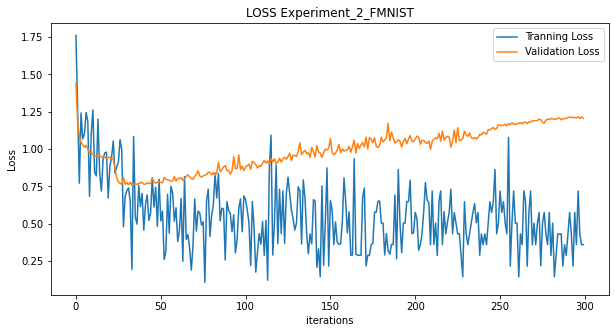

In [ ]:
plt.figure(figsize=(10,5))
plt.title("LOSS Experiment_2_FMNIST")
plt.plot(_tranning_loss,label="Tranning Loss")
plt.plot(_validation_loss,label="Validation Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

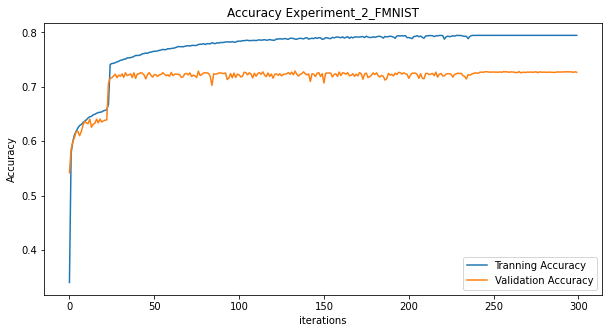

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Accuracy Experiment_2_FMNIST")
plt.plot(_tranning_acc,label="Tranning Accuracy")
plt.plot(_validation_acc,label="Validation Accuracy")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()